<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C5_Analyzing_the_Online_Shopper%E2%80%99s_Purchase_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Step 1: Introduction

Online shopping's explosive growth, a staggering 14.6% per year, seems at odds with its stagnant conversion rates. Picture yourself browsing Amazon, filling your cart with treasures, only to abandon it at the checkout. This familiar phenomenon lies at the heart of a critical question: what drives a shopper's decision to buy? In this notebook, we'll dissect the hidden psychology behind online purchases, unveiling the levers that can transform wish lists into sales, and finally break the conversion drought.

Let's dive into the numerical features of our dataset, as detailed in the table below.

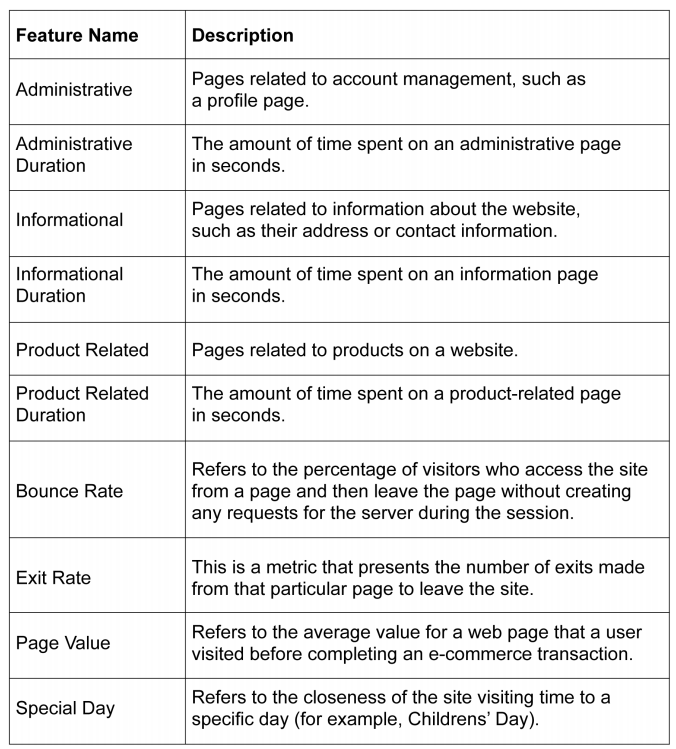

The table below outlines the key categorical features of the dataset we'll be analyzing.

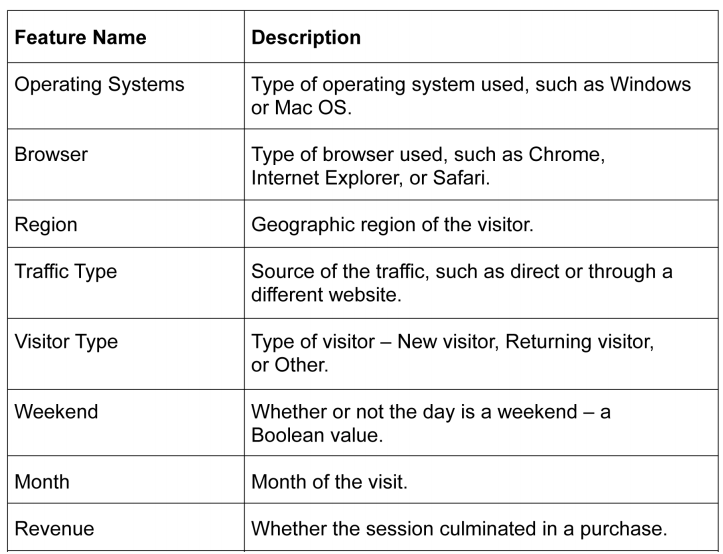

Some information on bounce rate and exit rate:
- Bounce rate is the percentage of visitors who leave a website after viewing only one page. It indicates how frequently users visit your site without interacting or exploring further. While some bounces are unavoidable, a high bounce rate may indicate that your content is unsatisfactory or poorly optimized. A good bounce rate is around 40% or lower, while a bounce rate of 60% or higher may be an indication that you need to evaluate your page content and make it more helpful and engaging for users.

- Exit rate is the percentage of people who leave a particular page after visiting any number of pages on a website.

Read more [here](https://www.semrush.com/blog/bounce-rate/).

# Step 2: Import data and libraries

In [ ]:
!pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# ggplot 2 style
import matplotlib as mpl
mpl.style.use(['ggplot'])

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter05/Datasets/online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# check for nulls
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Step 3: Exploratory Data Analysis

## 3.1. Univariate analysis

Univariate analysis is the simplest form of analysis and is where we analyze each feature (column of a DataFrame) and try to uncover the pattern or distribution of the
data. In this section, we will be looking at the following features:
- Revenue column
- Visitor type
- Traffic type
- Region
- Weekend-wise distribution
- Browser and operating system
- Administrative page
- Information page
- Special day

In [16]:
# define some functions to reduce repeating code
def column_distribution(col_name, data=df):
    sns.countplot(data=data, x=col_name)
    plt.title(f'{col_name} Distribution', fontsize = 16)

def count_values(col_name, data=df):
    print(f"Value counts for {col_name}")
    print(data[col_name].value_counts())
    print()
    print(data[col_name].value_counts(normalize=True))

def plot_multiple_distribution(cols_to_plot, data=df, figsize=(15,4)):
  plt.figure(figsize=figsize)
  for index, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), index + 1)
    column_distribution(col)

  plt.tight_layout()
  plt.show()

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### 3.1.1. Baseline Conversion Rate from the Revenue Column, Visitor and Traffic Type distribution

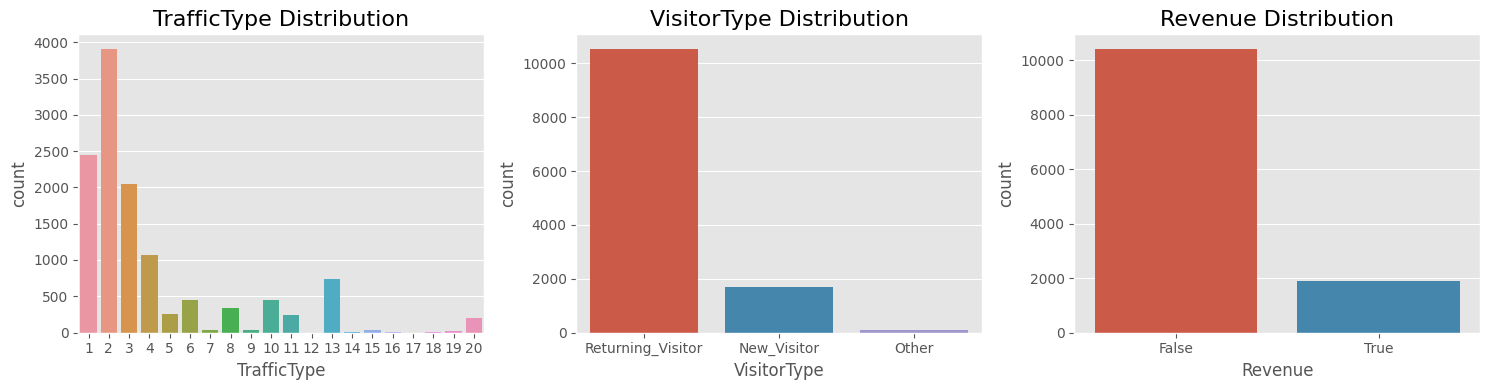

In [15]:
cols_to_plot = [ 'TrafficType', 'VisitorType', 'Revenue']
plot_multiple_distribution(cols_to_plot, data=df, figsize=(15,4))

In [12]:
count_values('Revenue')

Value counts for Revenue
False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


From the preceeding data and plot, we can see that:

- **Traffic Type**: We want to find out how the visitors visit our page to determine what amount of site traffic is accounted for by direct visitors (meaning they enter the URL into the browser) and how much is generated through other mediums, such as blogs or advertisements. Sources 2, 1, 3, and 4 account for the majority of our web traffic.

- **Visitor Type**: the number of returning customers is higher than that of new visitors. This is good news as it means we have been successful in attracting customers back to our website.

- **Revenue** in this dataset simply refers to how many of the online shopping sessions ended in a purchase.
  - There's a total of 1,908 customers ended up making a purchase, while 10,422 customers did not.
  - The baseline conversion rate of online visitors versus overall visitors is a ratio between the total number of online sessions that led to a purchase divided by the total number of sessions. The conversion rate is calculated as follows: 1908/12330 * 100 = 15.47%

### 3.1.2. Distribution of Customers Session on the Website (Weekend, Special Day, and Region)

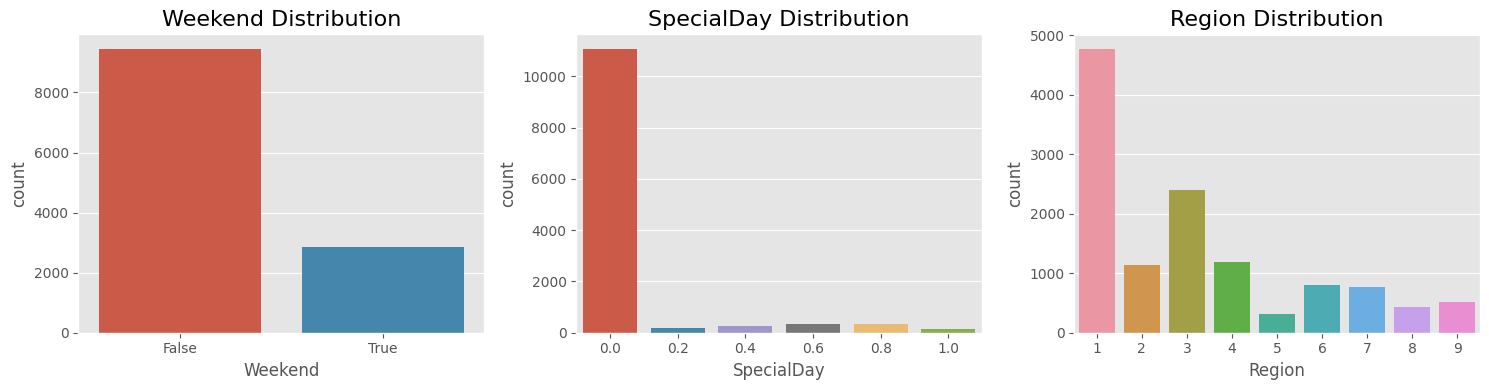

In [17]:
cols_to_plot = [ 'Weekend', 'SpecialDay', 'Region']
plot_multiple_distribution(cols_to_plot, data=df, figsize=(15,4))

In [18]:
count_values('SpecialDay')

Value counts for SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


From the plots, we can see that
- **Weekend**: more visitors visit during weekdays than weekend days.
- **Special Day**: 89.8% of visitors visited during a non-special day (special day subcategory 0), showing that there is no affinity of web
traffic toward special days.
- **Region**: Region 1 has the highest number of visitors. Regions 1 and 3 account for 50% of online sessions; thus, we can infer that regions 1 and 3 are where most potential consumers reside.

With these information, we can target our marketing campaigns better.

The numbers 1, 2, and so on represent the different regions that the data is sourced from. We can see that Region 1 has the highest number of visitors visiting our website.
Regions 1 and 3 account for 50% of online sessions; thus, we can infer that regions 1 and 3 are where most potential consumers reside. With this information, we can target our marketing campaigns better.

### 3.1.3. Distribution of brower, Operating System

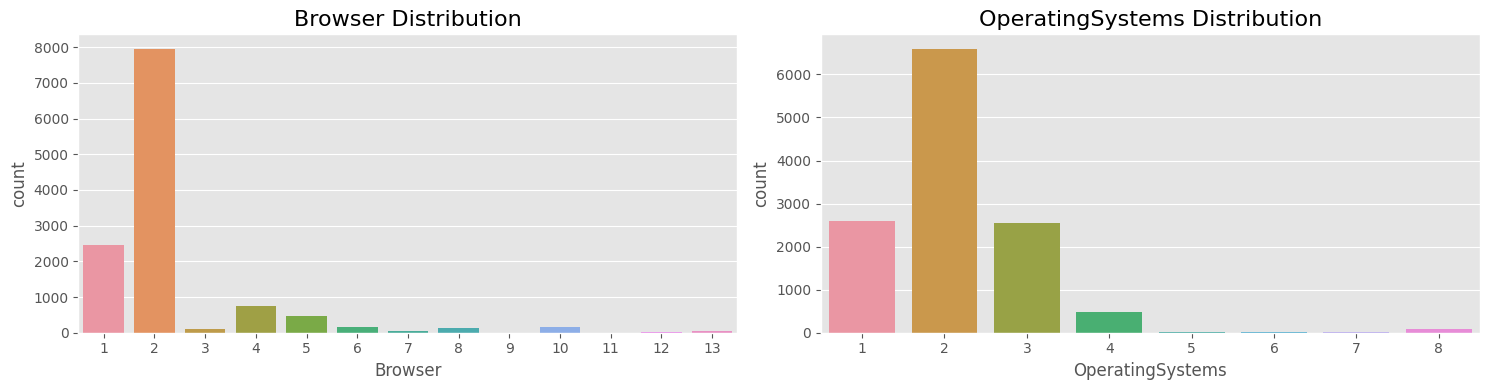

In [20]:
cols_to_plot = [ 'Browser', 'OperatingSystems']
plot_multiple_distribution(cols_to_plot, data=df, figsize=(15,4))

- **Browser**: type 2 contributes the most to the website traffic.
- **Operating System**: OS type 2 contributes the most to the website traffic.

### 3.1.4. Distribution of Administrative and Information Pageview

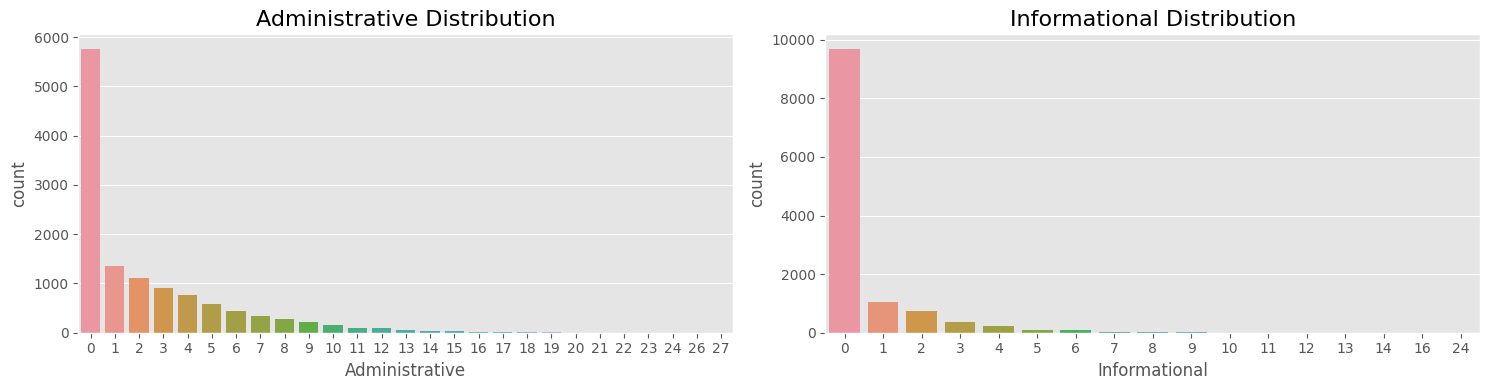

In [21]:
cols_to_plot = [ 'Administrative', 'Informational']
plot_multiple_distribution(cols_to_plot, data=df, figsize=(15,4))

- **Administrative Pageview**: administrative pages on a website can be pages where the content is being added to the site or the pages where the site is managed. We can see from the preceding plot that users tend to visit page 0 the most often
- **Informational Pageview**: The information pages of a site are the pages where the direct information is presented. The simple web pages that do not generate leads or that are not connected to lead-generating pages can be classified as information pages. Information page 0 has the highest
number of visitors.


## 3.2. Bivariate analysis

In this section, we will be focusing on bivariate analysis. Bivariate analysis is performed between two variables to look at their relationship—for example, to determine which type of browser leads to a successful transaction, or which region has the highest number of customers who ended up making a transaction. We will be performing bivariate analysis between the revenue column and the following categories:
- Visitor type
- Traffic type
- Region
- Browser type
- Operating system
- Month
- Special day

### 3.2.1. Revenue Versus Visitor Type

We will be plotting a categorical plot between Revenue and VisitorType. The categorical plot gives you the number of users in each subcategory, and whether each culminated in a purchase. The plot will define those users who did make a purchase as True, and those who did not as False:

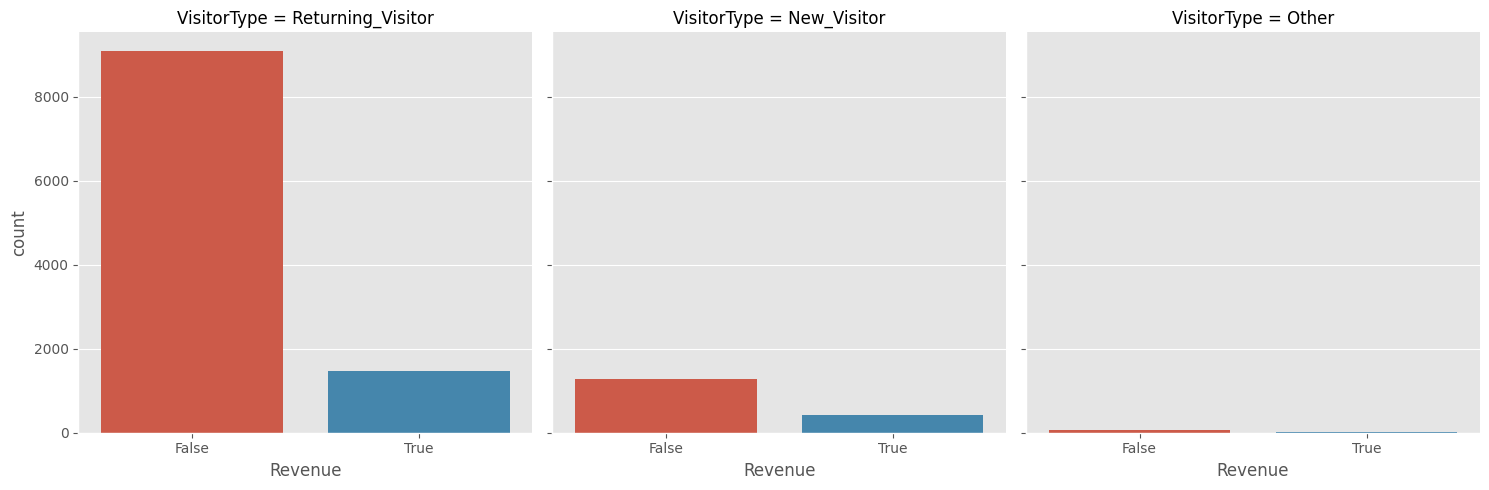

In [ ]:
g = sns.catplot(x="Revenue", col="VisitorType", col_wrap=3, data=df, kind="count", height=5, aspect=1)
plt.show()

More revenue conversions happen for returning customers than new customers. This clearly implies that we need to find ways to incentivize new customers to make a transaction with us.

### 3.2.2. Revenue Versus Traffic Type

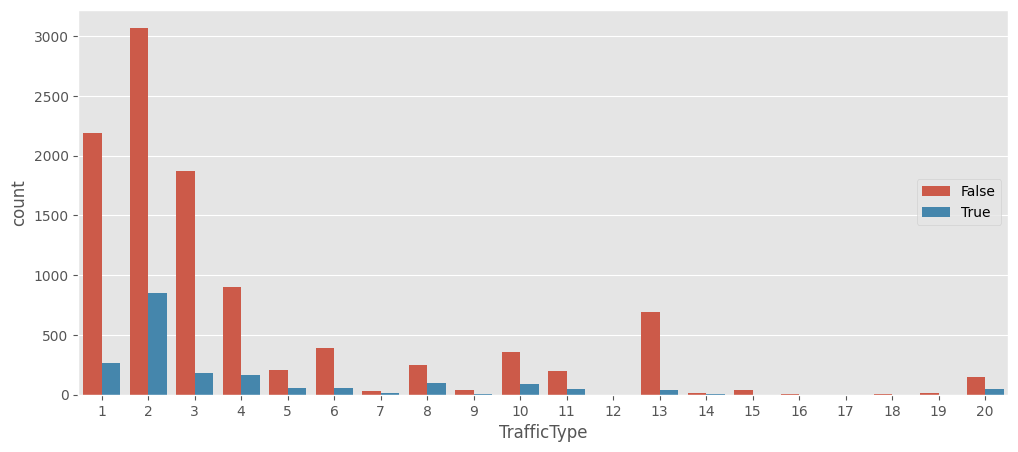

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

We can see that more revenue conversion happens for web traffic generated from source 2. Even though source 13 generated a considerable amount of web traffic, conversion is very low compared to others.

### 3.2.3.  Analyzing the Relationship between Revenue and Other Variables

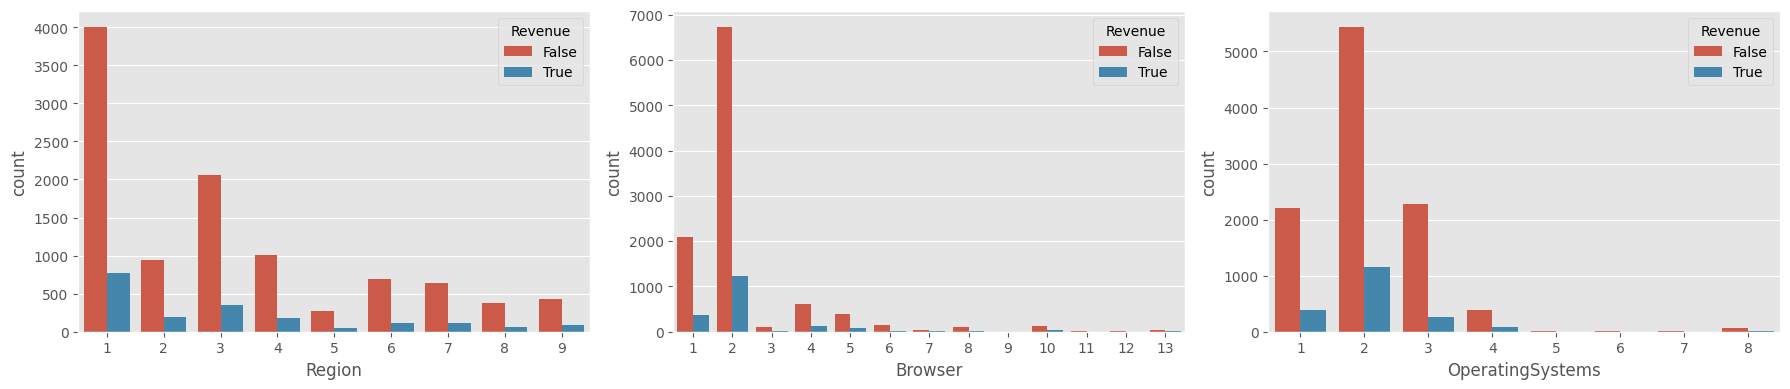

In [23]:
cols_to_plot = ['Region', 'Browser', 'OperatingSystems']
plt.figure(figsize=(18, 4))
for index, col in enumerate(cols_to_plot):
  plt.subplot(1, len(cols_to_plot), index + 1)
  sns.countplot(x=col, hue="Revenue", data=df)

plt.tight_layout()
plt.show()

- Region 1 accounts for most sales, and region 3 the second mos.
- More revenue-generating transactions have been performed from Browser 2. Even though Browser 1 creates a considerable number of sessions, the conversion rate is low.
- More revenue-generating transactions happened with OS 2 than the other types.

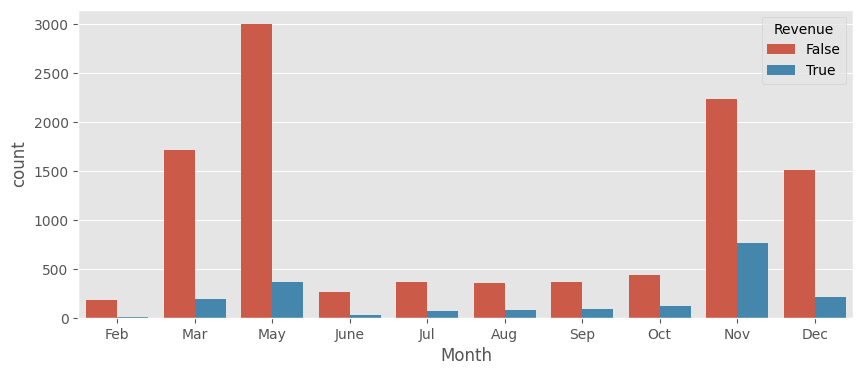

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x="Month", hue="Revenue", data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

Website visitors may be high in May, but we can observe from the preceding bar plot that a greater number of purchases were made in the month of November

## 3.3 Linear relationships

Basically, let's see if there's any linear relationship between these variables: ['PageValues', 'BounceRates', 'ExitRates', 'Administrative', 'Administrative_Duration','Informational', 'Informational_Duration']

In [ ]:
plot_data = df[['PageValues', 'BounceRates', 'ExitRates', 'Administrative', 'Administrative_Duration',
                'Informational', 'Informational_Duration']].corr()
plot_data.style.background_gradient(cmap='coolwarm').set_precision(2)

,PageValues,BounceRates,ExitRates,Administrative,Administrative_Duration,Informational,Informational_Duration
PageValues,1.00,-0.12,-0.17,0.10,0.07,0.05,0.03
BounceRates,-0.12,1.00,0.91,-0.22,-0.14,-0.12,-0.07
ExitRates,-0.17,0.91,1.00,-0.32,-0.21,-0.16,-0.11
Administrative,0.10,-0.22,-0.32,1.00,0.60,0.38,0.26
Administrative_Duration,0.07,-0.14,-0.21,0.60,1.00,0.30,0.24
Informational,0.05,-0.12,-0.16,0.38,0.30,1.00,0.62
Informational_Duration,0.03,-0.07,-0.11,0.26,0.24,0.62,1.00


From the matrix we can see that:
- There's a strong positive correlation between Bounce rate and Exit rate
- Page Value has slight negative correlation to both bounce rate and Exit Rate.
-  Administrative-related pageviews and the administrative-related pageview duration are positively correlated.
- Information page views and information pageview duration are positively correlated.

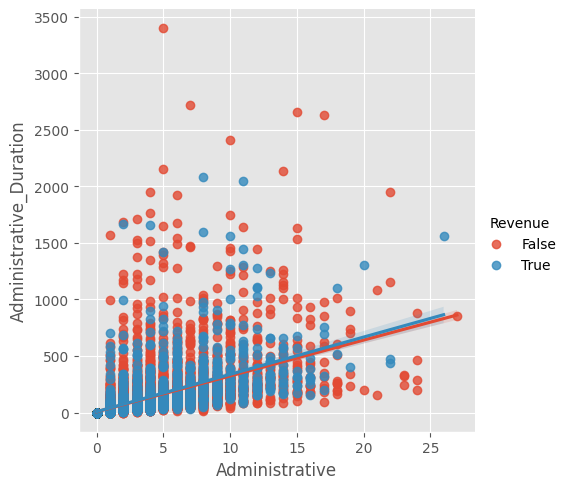

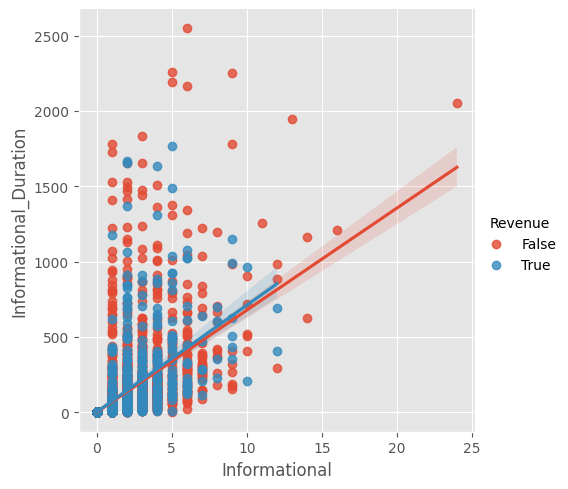

In [27]:
# lmplot with Revnue as hue
sns.lmplot(x="Administrative", y="Administrative_Duration",hue='Revenue', data=df)
sns.lmplot(x="Informational", y="Informational_Duration",hue='Revenue', data=df)

From the plot, we can see that: Customers who have made online purchases visited fewer numbers of informational pages. This implies that informational pageviews don't have much effect on revenue generation.

# Step 4: K-means Clustering

In [28]:
# function for elbow plot
def plot_elbow(x):
  wcss = []
  # Km: k-means clustering algorithm. Run the km for different values of k (1-10)
  for i in range(1, 11):
      km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
      # fit the k-means algorithm to the x
      km.fit(x)
      labels = km.labels_
      # append the inertia value we calculated using Kmeans to wcss
      wcss.append(km.inertia_)

  # plot the value of wcss with the value of k
  plt.rcParams['figure.figsize'] = (15, 7)
  plt.plot(range(1, 11), wcss)
  plt.grid()
  plt.tight_layout()
  plt.title('The Elbow Method', fontsize = 20)
  plt.xlabel('No. of Clusters')
  plt.ylabel('wcss')
  plt.show()

To make the graph more readable, assign the color pink for uninterested customers (in which Revenue is False), yellow for target customers (in which Revenue is True), and blue for the centroid of the clusters

In [34]:
# function to plot 2 clusters
def plot_2clusters(x, num_clusters=2):
  # run kmeans with 2 clusters
  km = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # predict y (in this case 2 clusters mean 2 labels 0 and 1)
  y_means = km.fit_predict(x)

  plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
  plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

  plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
  plt.grid()
  plt.xlabel('Informational Duration')
  plt.ylabel('Bounce Rates')
  plt.legend()
  plt.show()

def plot_3clusters(x, num_clusters=3):
  km = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
  y_means = km.fit_predict(x)

  plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
  plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
  plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
  plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

  plt.title('Administrative Duration vs BounceRates', fontsize = 20)
  plt.grid()
  plt.xlabel('Administrative Duration')
  plt.ylabel('Bounce Rates')
  plt.legend()
  plt.show()

## 4.1 Informational Duration versus Bounce Rate

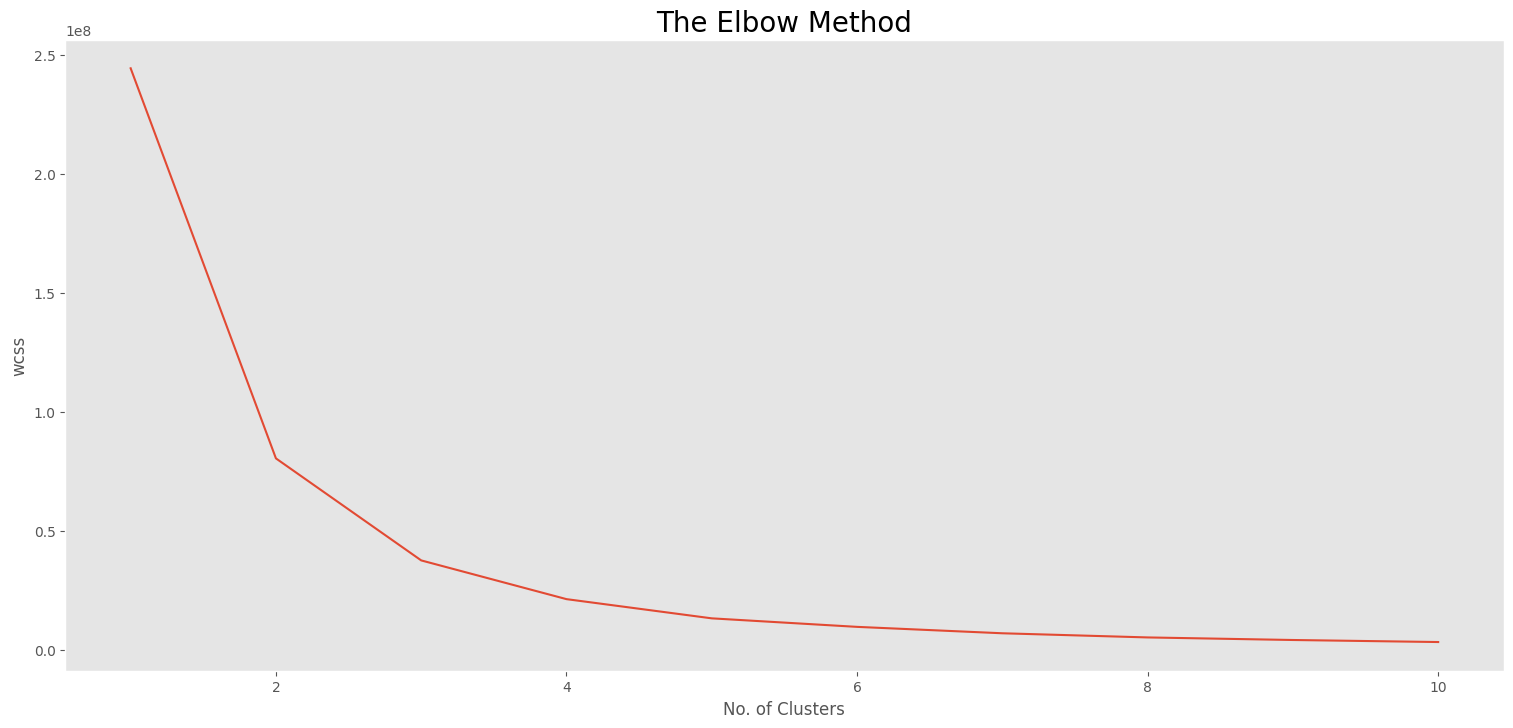

In [29]:
# Select the columns and assign them to a variable called x
x = df.iloc[:, [3, 6]].values
plot_elbow(x)

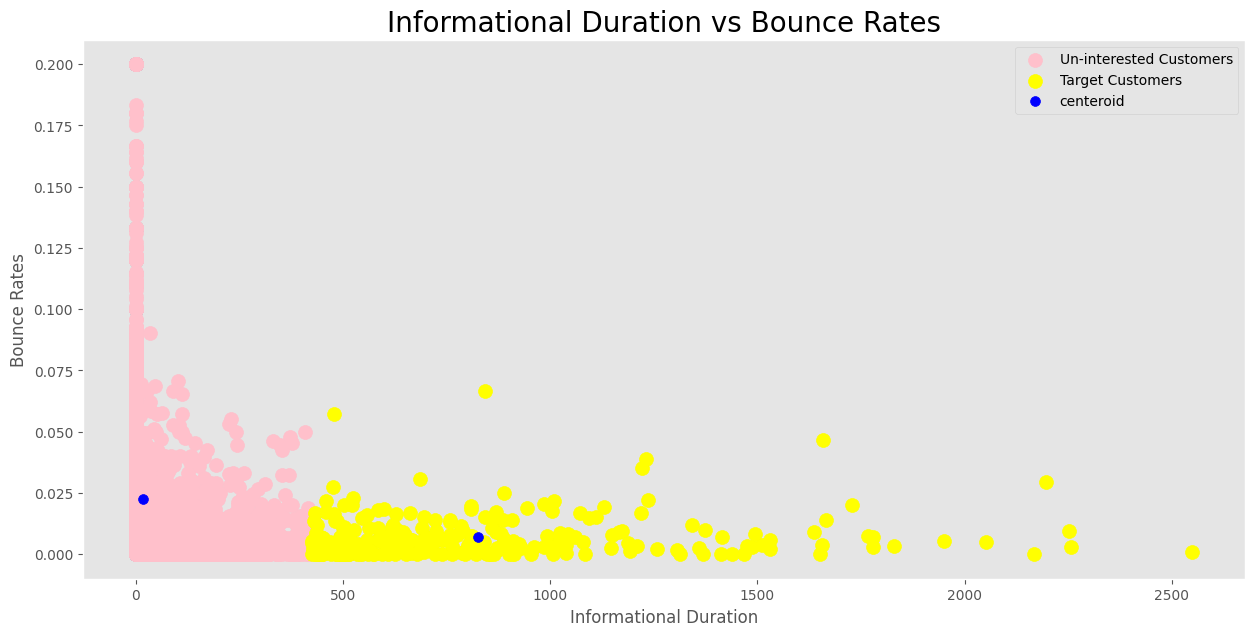

In [31]:
plot_2clusters(x)

We would want to target the customer with high information duration and low bounce rate. From the preceding graph, we can see that our target customers spend around 850-900 seconds on average on the Information page.

## 4.2  Informational Duration versus Exit Rate

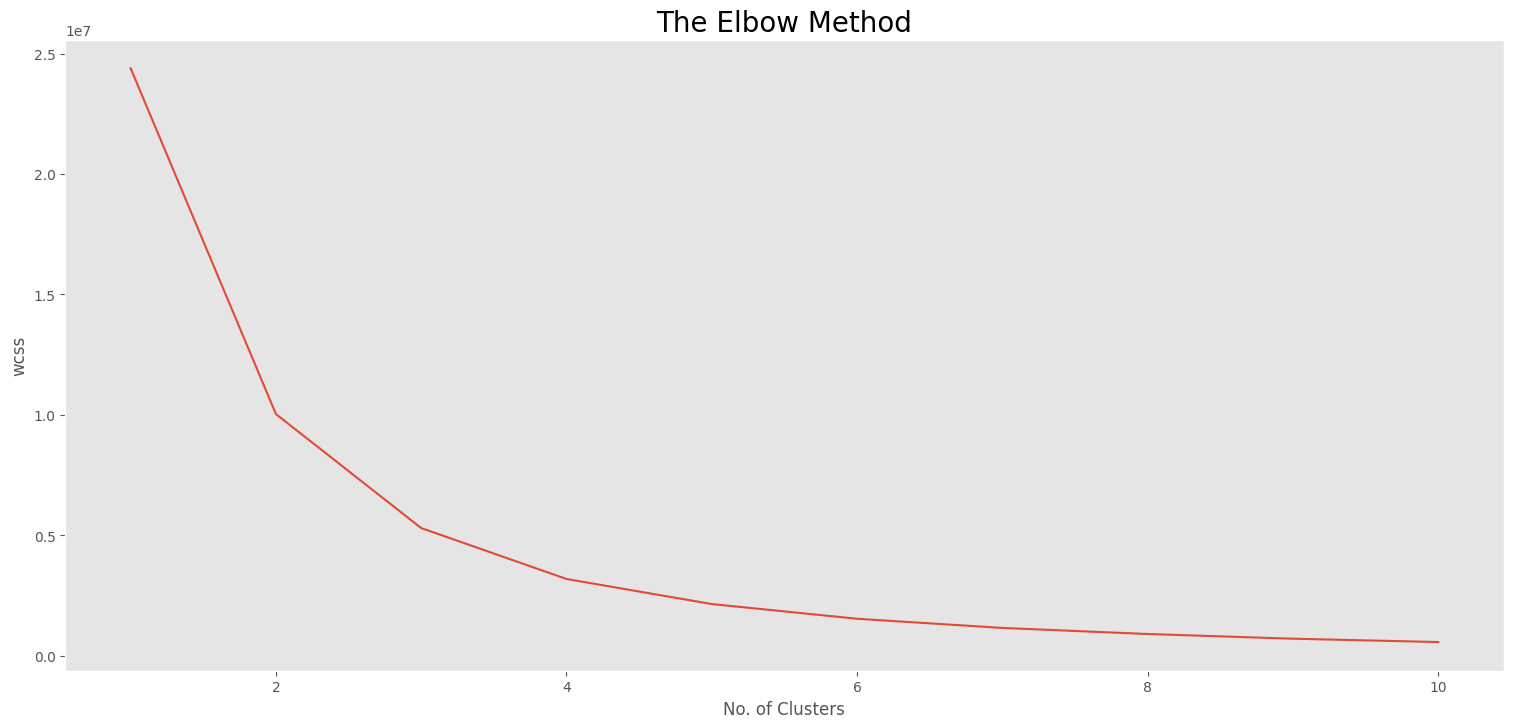

In [32]:
# elect the columns and assign them to a variable called x
x = df.iloc[:, [4, 7]].values
plot_elbow(x)

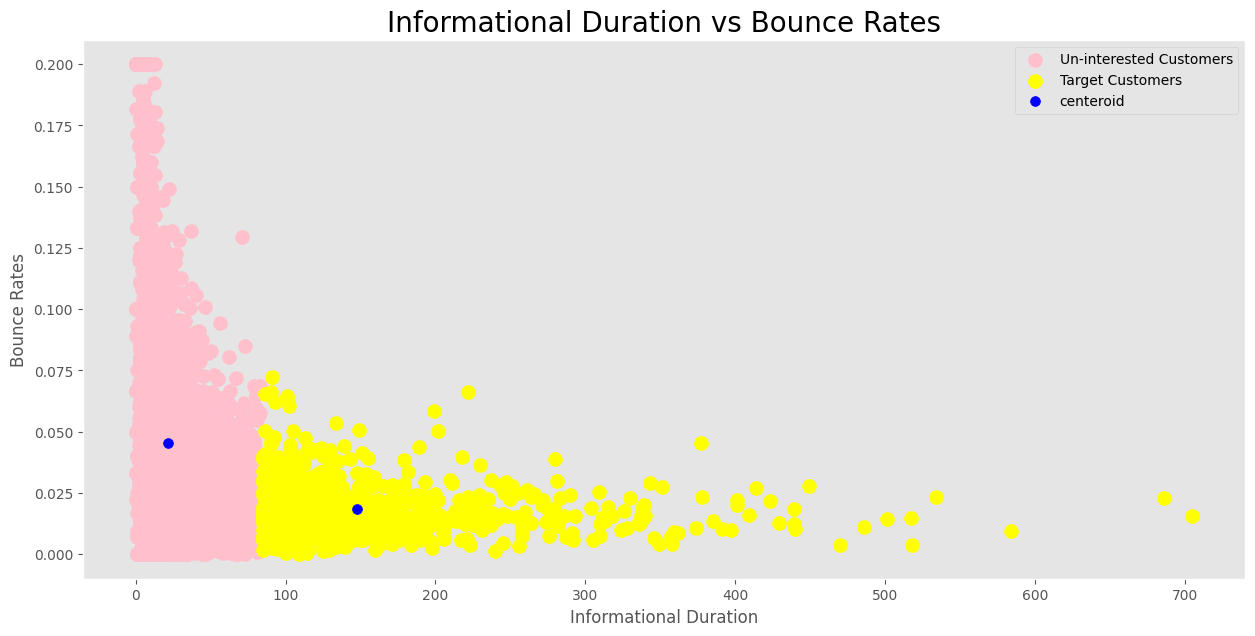

In [33]:
plot_2clusters(x)

From the preceding cluster, we can infer that our target customers spend around 150 seconds more on average than the other customers before exiting.

## 4.3 Administrative Duration versus Bounce Rate and Administrative Duration versus Exit Rate

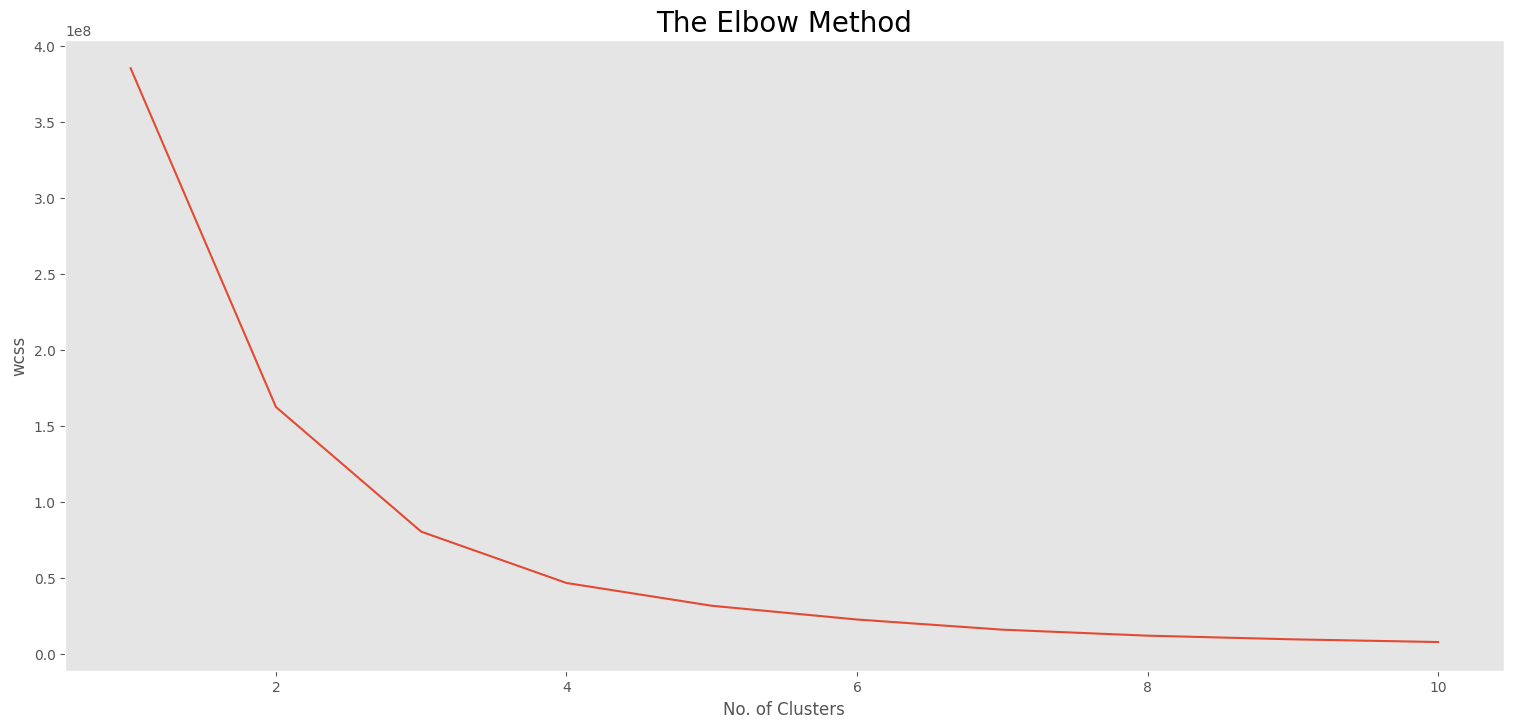

In [35]:
# Administrative duration vs Bounce Rate
x = df.iloc[:, [1, 6]].values
plot_elbow(x)

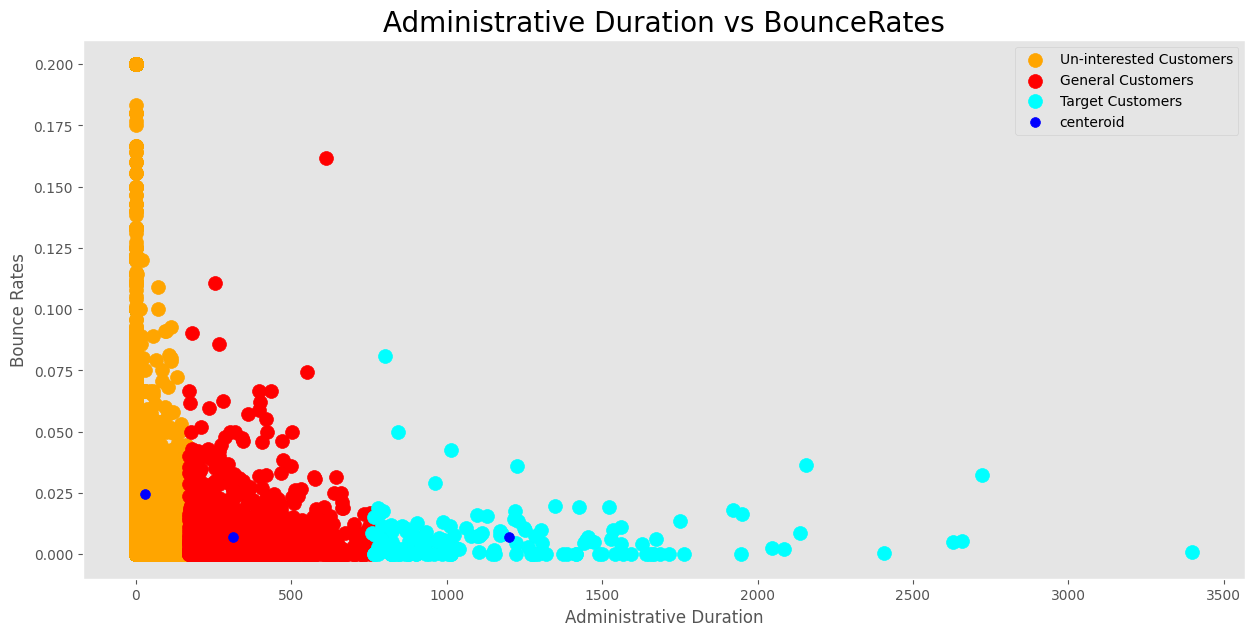

In [36]:
plot_3clusters(x)

From all the analysis we've performed in this chapter, we can conclude the following:
- The conversion rates of new visitors are high compared to those of returning customers.
- While the number of returning customers to the website is high, the conversion rate is low compared to that of new customers.
- Pages with a high page value have a lower bounce rate. We should be talking with our tech team to find ways to improve the page value of the web pages.

These factors will largely influence the next plan of action and open new avenues for more research and new business strategies and plans.

Now let's add some ML for predicting which page visit would likely follow up by a purchase.

# Step 5. Modeling

## 5.1. Import some libraries & Prepare data

In [37]:
# scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from collections import Counter

In [38]:
# one hot encoding
df1 = pd.get_dummies(df)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [42]:
# Label encoding of weekend
df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [81]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
X = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of X: ", x.shape)
print("Shape of y: ", y.shape)

Shape of X:  (12330, 2)
Shape of y:  (12330,)


## 5.2 Naive Bayes

In [82]:
# Splitting of the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 0)

# checking the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


In [45]:
# model define and training
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

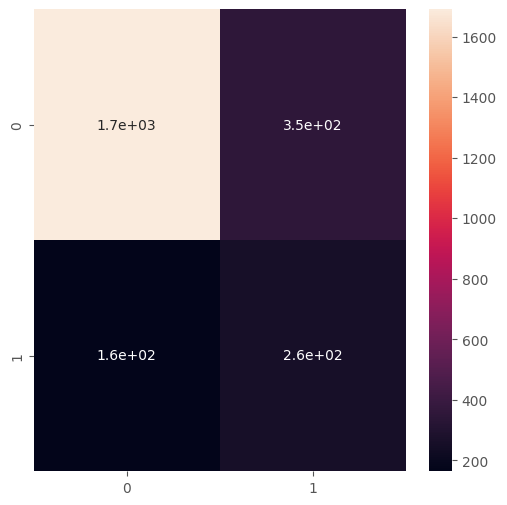

In [46]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [47]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2044
           1       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



Naive Bayes can predict acurately for 0 label and quite poorly on 1 label. This is due to the imbalance in labels. Let's try XGBoost which has won many Kaggle competition.

## 5.3 XGBoost

In [48]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [49]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }


# instantiate the classifier
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
y_pred = xgb_clf.predict(X_test)
# compute and print accuracy score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

XGBoost model accuracy score: 0.8917
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2044
           1       0.73      0.58      0.65       422

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



The result is much better with XGBoost. How ever result for label 1 is still not good, let's oversampling label 1 and use XGBoost again.

### Oversampling with SMOTE


In [83]:
# oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 10422, 1: 10422})


In [52]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }


# instantiate the classifier
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2074
           1       0.92      0.93      0.93      2095

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169



The results for both label are good (over 90% of all the metrics)!

## 5.4 Neural Network

I am curious on how neural network would perform with this data. So let's build a simple neural network.

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [106]:
y = df1['Revenue']
X = df1.drop(['Revenue'], axis = 1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Reserve 2000 samples for validation
X_val = X_train[-2000:]
y_val = y_train[-2000:]
X_train = X_train[:-2000]
y_train = y_train[:-2000]

In [107]:
# define the model
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

# Last layer for binary classification
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
143/143 [==============================] - 3s 6ms/step - loss: 1.4902 - accuracy: 0.7230 - val_loss: 1.5962 - val_accuracy: 0.8540
Epoch 2/50
143/143 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.8464 - val_loss: 0.4906 - val_accuracy: 0.8435
Epoch 3/50
143/143 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.8468 - val_loss: 0.3959 - val_accuracy: 0.8710
Epoch 4/50
143/143 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.8561 - val_loss: 0.3692 - val_accuracy: 0.8755
Epoch 5/50
143/143 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.8612 - val_loss: 0.5011 - val_accuracy: 0.8775
Epoch 6/50
143/143 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.8692 - val_loss: 0.8632 - val_accuracy: 0.7735
Epoch 7/50
143/143 [==============================] - 0s 3ms/step - loss: 0.8207 - accuracy: 0.8451 - val_loss: 1.1856 - val_accuracy: 0.7085
Epoch 

In [62]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


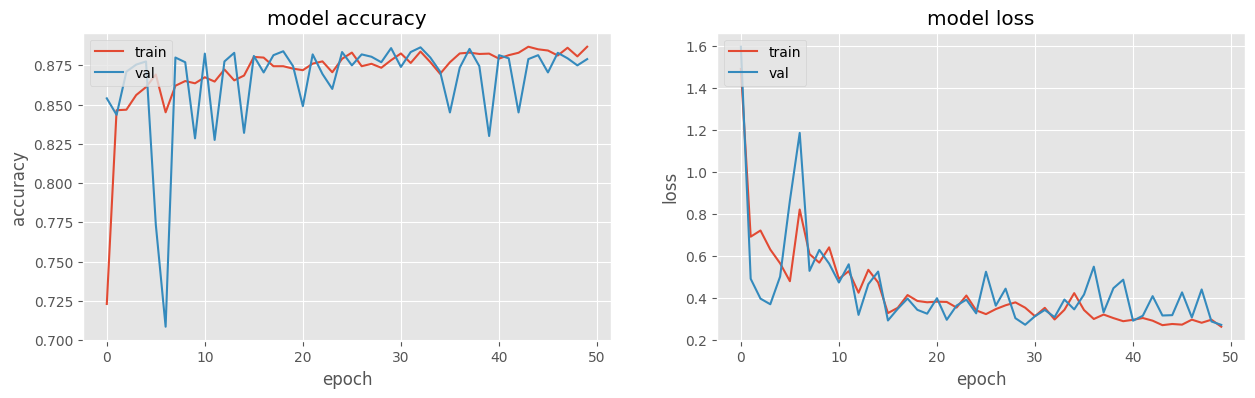

In [108]:
plt.figure(figsize=(15,4))
# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The accuaracy and loss fluctuate a lot for validation set while the training loss and accuracy improve stedily, which may means the model might be underfit or we may need to train for more epochs, this could due to the imbalance in labels. Let's see how our model perform on test set.

In [109]:
# Evaluate on test set
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8686
[0.2895853817462921, 0.8686131238937378]
Loss =  0.2895853817462921
Accuracy =  0.8686131238937378


In [110]:
# predict on the test set
y_pred = model.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])
cr = metrics.classification_report(y_test, y_pred)
print(cr)

39/39 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1017
           1       0.65      0.55      0.59       216

    accuracy                           0.87      1233
   macro avg       0.78      0.74      0.76      1233
weighted avg       0.86      0.87      0.86      1233



The results aren't really good for label 1, let's try oversampling

### Oversampling

In [97]:
# oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 10422, 1: 10422})


In [98]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Reserve 4000 samples for validation
X_val = X_train[-4000:]
y_val = y_train[-4000:]
X_train = X_train[:-4000]
y_train = y_train[:-4000]

# define the model
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

# Last layer for binary classification
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
231/231 [==============================] - 2s 4ms/step - loss: 1.6687 - accuracy: 0.6884 - val_loss: 0.8606 - val_accuracy: 0.7105
Epoch 2/50
231/231 [==============================] - 1s 4ms/step - loss: 0.7834 - accuracy: 0.7649 - val_loss: 0.4304 - val_accuracy: 0.8180
Epoch 3/50
231/231 [==============================] - 1s 4ms/step - loss: 0.6519 - accuracy: 0.7895 - val_loss: 0.5060 - val_accuracy: 0.8240
Epoch 4/50
231/231 [==============================] - 1s 4ms/step - loss: 0.5717 - accuracy: 0.8112 - val_loss: 0.7494 - val_accuracy: 0.7930
Epoch 5/50
231/231 [==============================] - 1s 3ms/step - loss: 0.7341 - accuracy: 0.7928 - val_loss: 0.6568 - val_accuracy: 0.8165
Epoch 6/50
231/231 [==============================] - 1s 3ms/step - loss: 0.5585 - accuracy: 0.8187 - val_loss: 0.3792 - val_accuracy: 0.8525
Epoch 7/50
231/231 [==============================] - 1s 2ms/step - loss: 0.5766 - accuracy: 0.8150 - val_loss: 0.4945 - val_accuracy: 0.7870
Epoch 

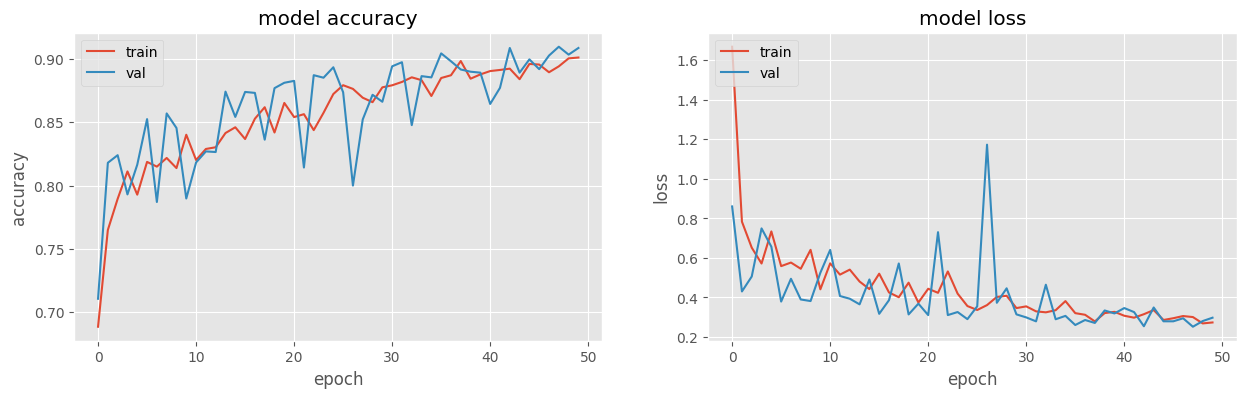

In [99]:
plt.figure(figsize=(15,4))
# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The accuracy for both val and train set fluctuate a bit but keep improving, let's see how it perform on test set.

In [100]:
# Evaluate on test set
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

33/33 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9070
[0.2871083915233612, 0.9069544076919556]
Loss =  0.2871083915233612
Accuracy =  0.9069544076919556


In [105]:
# predict on the test set
y_pred = model.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])
cr = metrics.classification_report(y_test, y_pred)
print(cr)

66/66 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1029
           1       0.88      0.94      0.91      1056

    accuracy                           0.91      2085
   macro avg       0.91      0.91      0.91      2085
weighted avg       0.91      0.91      0.91      2085



The results are much better, almost comparable with XGBoost, with some finetuning and more epochs, we may possibly improve the results.

# References
- https://www.kaggle.com/code/mamun18/final-project-online-shoppers-intention
- https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook
- https://www.tensorflow.org/guide/keras/training_with_built_in_methods
- https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/